In [5]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import datasets, layers, models 

- konvolucija = 
- computer vision (tradicional) = definisanje matrica, tzv. filteri, da kada pomnozimo sliku sa filterom dobijemo neku promene slike
- filteri za ivice 

- modern computer vision = slika (ulaz u neuronsku mrezu) i postoji neki kernel (filter) = operacija konvolucije matrica - nije isto kao mnozenje matrica i vrsim skalarni proizvod tacka po tacka pa saberem; setam kernel matricu red po red, i dobijem matricu nesto manjeg formata;
nad svakim elementom rezultujuce matrice primenim **funkciju aktivacije**
 
 modeluju nelinearne zavisnosti
 
 **uci se filter!!!** naucicemo optimalne kernele one koji rade sta treba tako da sve klasifikuje; **operacija ukrupnjavanja ili agregacije** = menjanje grupe piksela jednim pikselom **average pulling** = menjanje matricom prosekom; dobre rezultate daje **max polling**

- konvulucija, pulling, konvulucija, polling, itd..

In [8]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 9s 0us/step


In [9]:
train_images.shape
# 50000 slika, dimenzija 32x32x3

(50000, 32, 32, 3)

In [10]:
class_names = ['airplane', 'automobile','bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [11]:
train_images.max()

255

In [12]:
train_images.min()

0

- dobro je da slike normalizujemo na [0,1], generalno podaci kada treba da idu u neuronsku mrezu


In [13]:
train_images, test_images = train_images/255.0, test_images/255.0

In [14]:
train_images.max()

1.0

In [20]:

model = models.Sequential() # objekat u kojeg mogu da dodajem jedan po jedan sloj

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))

# model.add(layers.MaxPool2D((2, 2)))
# model.add(layers.Conv2D(64, (3,3), activation='relu'))
# model.add(layers.MaxPool2D((2, 2)))
# model.add(layers.Conv2D(64, (3,3), activation='relu'))

model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))


In [21]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-trai

In [23]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [24]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)             

In [33]:
epoches = 10
batch_size = 64 # u svakoj epohi se gradijent racuna na osnovu podskupa
num_classes = 10

train_label_cat = tf.keras.utils.to_categorical(train_labels, num_classes)
test_label_cat = tf.keras.utils.to_categorical(test_labels, num_classes)

model.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

history = model.fit(train_images, train_label_cat, epochs=epoches, batch_size=batch_size, validation_data=(test_images, test_label_cat))

Epoch 1/10
782/782 [==============================] - 79s 99ms/step - loss: 1.5486 - accuracy: 0.4323 - val_loss: 1.3730 - val_accuracy: 0.5070
Epoch 2/10
782/782 [==============================] - 77s 99ms/step - loss: 1.1803 - accuracy: 0.5845 - val_loss: 1.1317 - val_accuracy: 0.5992
Epoch 3/10
782/782 [==============================] - 75s 96ms/step - loss: 1.0249 - accuracy: 0.6402 - val_loss: 1.0224 - val_accuracy: 0.6446
Epoch 4/10
782/782 [==============================] - 77s 98ms/step - loss: 0.9239 - accuracy: 0.6761 - val_loss: 0.9572 - val_accuracy: 0.6640
Epoch 5/10
782/782 [==============================] - 79s 101ms/step - loss: 0.8546 - accuracy: 0.7021 - val_loss: 0.8968 - val_accuracy: 0.6949
Epoch 6/10
782/782 [==============================] - 79s 101ms/step - loss: 0.7950 - accuracy: 0.7227 - val_loss: 0.8924 - val_accuracy: 0.6936
Epoch 7/10
782/782 [==============================] - 77s 98ms/step - loss: 0.7460 - accuracy: 0.7401 - val_loss: 0.8543 - val_accurac

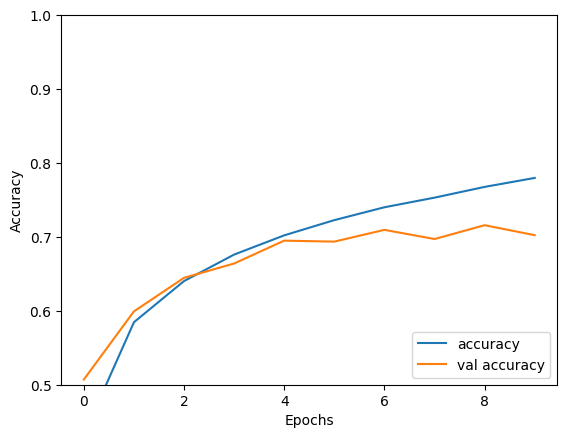

In [37]:
# gledamo kako se loss funkcija kretala

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [ ]:
# ovo dole je problem
# jer smo trenirali na malom broju epoha
# dodamo jos neki sloj ili povecamo broj epoha

In [38]:
test_loss, test_acc = model.evaluate(test_images, test_label_cat, verbose=2)

313/313 - 4s - loss: 0.8856 - accuracy: 0.7023 - 4s/epoch - 13ms/step


In [40]:
! mkdir models

In [41]:
! ls

models	sample_data


In [42]:
# cuvamo model kako mozemo da ga koristimo vise puta

models_path = "models/basic_network.h5"
model.save(models_path)

In [43]:
! ls models/

basic_network.h5


In [44]:
backup_model = model
model = None

In [45]:
print(model)

None


In [46]:

model = tf.keras.models.load_model(models_path)

In [47]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)             